# Study of computer games popularity

Project objective: identify factors influencing or confidently correlating with game’s commercial success to give the customer recommendations on marketing strategies for the next year.

Customer: online store for computer games.
For the study, data for 2016 was provided from open sources: data on game sales, user and expert ratings, genres and platforms.

## Data familarization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
df = pd.read_csv('C:\\Users\\Яна\\Documents\\Прогр\\dfs\\games.csv')
df.info()
display(df.head(10))
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


There are no gaps in the name of the platform and data on the number of sales.

Two gaps in the columns Name and Genre of the game, at least strange. I think these are the same lines, later I'll look at them closer.

Columns with the year of release of the game, the rating of critics and the rating of players need to be converted to a number format.

It is also necessary to rename the columns as indicated in the data description.

## Data preprocessing

### Rename columns

In [3]:
df = df.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 
                        'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales', 
                        'Other_sales': 'other_sales', 'Critic_Score': 'critic_score', 
                        'User_Score': 'user_score', 'Rating': 'rating' })

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Processing missings

In [4]:
display(df[df['name'].isna()])

df['name'] = df['name'].fillna('Unknown')
df['genre'] = df['genre'].fillna('Unknown')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Now I'll look at those two unnamed games of an unknown genre.
Something old and not very popular, judging by the volume of sales. Nevertheless, there is at least some data, so let it remain in the table. Missed titles and genres I'll replace with Unknown, so as not to interfere with further processing.

In [5]:
df = df.dropna(subset = ['year_of_release']).reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


A little more than one and a half percent of games lack data on the release year, this is not critical, and one of the key parameters for research. There is nowhere to get this information from (unless you google it manually). So I'm just deleting those lines.

As for expert and user ratings, try to fill them with any type of average, based on the genre and year of release ... It'll be like roll the dice. The same with the age rating, we can’t guess it, and not all games are assigned it. We can't also delete them, because it is more than half of the table. So I leave gaps in these columns.

In [6]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
display(df[df['user_score'] == 'tbd'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


There are some 'tbd's in the table. This is a designation for games for which sufficient data has not yet been collected. That is, the rating will be, but later. Since then I need to bring the column to a numeric form, and these are string values, I will replace them with NaNs. From the point of view of the objectives of the study, we do not care for what reason there is no rating.

### Processing duplicates

In [7]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

print(len(list(df['name'].unique())))

names = df['name'].tolist()
names = [x.lower() for x in names]
    
print(len(np.unique(names)))

(16446, 11)
(16446, 11)
11427
11427


To check a list of game titles for implicit duplicates, I create a lowercase list of titles, and compare the number of unique values in that list with the number of unique values in the Name column. The number matches, so there are no implicit duplicates due to case in the table. I will leave typos on the conscience of the compilers of the dataset.

But here something interesting came out. The length of the dataset did not change after removing obvious duplicates (16446), but there are only 11427 values in the list of unique game titles. Are there about 5 thousand rows in the dataset with different data on the same games? Let's see what kind of games these are, and what to do with the lines.

In [8]:
df['name'].value_counts().head(10)

Need for Speed: Most Wanted                12
Ratatouille                                 9
FIFA 14                                     9
LEGO Marvel Super Heroes                    9
FIFA 15                                     8
LEGO Jurassic World                         8
Madden NFL 07                               8
LEGO Star Wars II: The Original Trilogy     8
FIFA Soccer 13                              8
Angry Birds Star Wars                       8
Name: name, dtype: int64

I see that there are quite a lot of lines with duplicated game names. I'll pick one game and see what the duplicates look like.

In [9]:
display(df[df['name'] == 'Need for Speed: Most Wanted'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
252,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
519,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1178,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1575,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1977,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2026,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3532,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5884,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6178,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6311,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


I'm not a gamer, but judging by this table, the same game can be released on different platforms, in different years, with different success and age rating. Well, then these doubles remain in the table.

### Columns data types

In [10]:
df['year_of_release'] = df['year_of_release'].astype(int)
df['critic_score'] = df['critic_score'].astype({"critic_score": "Int64"})
df["user_score"] = pd.to_numeric(df["user_score"])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(5), int32(1), object(4)
memory usage: 1.5+ MB


### Adding total sales

In [11]:
df['tot_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

display(df.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tot_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN,28.31


Count the total sales for all regions for each game.

## Data analysis

### Question 1. Look at how many games were released in different years. Is data for all periods important?

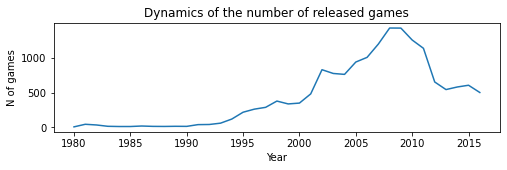

In [12]:
df_year = df.groupby('year_of_release')['tot_sales'].count()
df_year.plot(figsize = (8, 2))
plt.title('Dynamics of the number of released games')
plt.xlabel('Year')
plt.ylabel('N of games')
plt.show()

I group the data by year of release.

The graph shows two sharp jumps, when the number of games per year increased approximately twice - in 1994 and in 2002. in 2008-2009 there was a peak in the number of released games, and then a noticeable decline. The chart has been relatively stable since 2012. I will consider the data from this year as relevant.

Note: we have data up to 2016. According to the project objective, we make a forecast for 2017.

### Question 2: See how sales have changed by platform. Select the platforms with the highest total sales and plot the distribution by year. How long does it take for new platforms to appear and old ones to disappear?

In [13]:
plat_sales = df.groupby('platform')['tot_sales'].agg('sum').sort_values(ascending = False)
print('Num of platforms in the table:', len(plat_sales))
print()
display(plat_sales)

Num of platforms in the table: 31



platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: tot_sales, dtype: float64

To choose an approach to solving this task, I make an overall sales rating and see how many platforms it has. Thirty one. Too much to build a graph for each. So I display the entire rating on the screen and look at it.

There are also two sharp jumps in sales volumes, for the analysis of sales I'll take the top six.

In [14]:
df_top_sales = df[['platform', 'year_of_release', 'tot_sales']]
top_sales = df_top_sales.groupby(['platform', 'year_of_release'])['tot_sales'].sum().reset_index()

PS2 = top_sales[top_sales['platform'] == 'PS2'].copy()
X360 = top_sales[top_sales['platform'] == 'X360'].copy()
PS3 = top_sales[top_sales['platform'] == 'PS3'].copy()
Wii = top_sales[top_sales['platform'] == 'Wii'].copy()
DS = top_sales[top_sales['platform'] == 'DS'].copy()
PS = top_sales[top_sales['platform'] == 'PS'].copy()

PS2['PS2_sales'] = PS2['tot_sales']
X360['X360_sales'] = X360['tot_sales']
PS3['PS3_sales'] = PS3['tot_sales']
Wii['Wii_sales'] = Wii['tot_sales']
DS['DS_sales'] = DS['tot_sales']
PS['PS_sales'] = PS['tot_sales']

I create separate datasets for each platform so that the graph is more visual.

Then I build graphs on common axes.

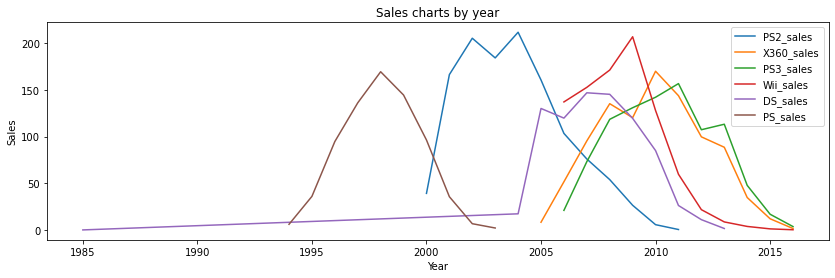

In [15]:
ax = PS2.plot(x = 'year_of_release', y = 'PS2_sales', figsize = (14, 4))
X360.plot(x = 'year_of_release', y = 'X360_sales', ax = ax)
PS3.plot(x = 'year_of_release', y = 'PS3_sales', ax = ax)
Wii.plot(x = 'year_of_release', y = 'Wii_sales', ax = ax)
DS.plot(x = 'year_of_release', y = 'DS_sales', ax = ax)
PS.plot(x = 'year_of_release', y = 'PS_sales', ax = ax)

plt.title('Sales charts by year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

From the graph, we can see that all the lines have the shape of a mountain - that is, any platform gains popularity, and then loses it. There are no charts where a significant decline would be replaced by a rise to a much greater height. Obviously, in the world of gamers, novelty matters.

### Estimation of the characteristic lifetime of platforms

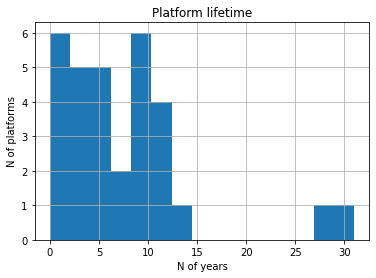

count    31.000000
mean      7.612903
std       6.998464
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: lifetime, dtype: float64


,min,max,lifetime
platform,,,
DS,1985,2013,28
PC,1985,2016,31


In [16]:
df_existing = df[['platform', 'year_of_release']]
df_exist = df_existing.groupby(['platform'])['year_of_release'].agg(['min', 'max'])
df_exist['lifetime'] = df_exist['max'] - df_exist['min']

df_exist['lifetime'].hist(bins = 15)
plt.title('Platform lifetime')
plt.xlabel('N of years')
plt.ylabel('N of platforms')
plt.show()

print(df_exist['lifetime'].describe())

display(df_exist[df_exist['lifetime'] > 25])

To estimate the lifespan of platforms, I create a dataset with the years of release of the first and last games on the platform. Then I add a column with a difference - the number of years the platform has existed.
I build a histogram and display the characteristics of the sample.

The histogram shows that platforms most often exist for no more than a year. If the platform managed to survive the first four years, then most likely it will live for 9-10 years.
Median lifetime 6 years, average 7.6. But the average is obviously distorted by the "centenarians" who reached about up to thirty. Surely I'd call them legendary if I played something other than Tetris.

### Question 3. Take data for the actual period. Determine the actual period yourself as a result of the study of the previous questions. The main factor is that these data will help build a forecast for 2017.

As I wrote above, the number of games released to the market has been at the current level since 2012. In addition, the median lifetime of the platform is six years, which means that it makes no sense to take data before 2010. Most likely there will be many platforms that are no longer on the market. So I set the current period 2012-2016.

In [17]:
df = df[df['year_of_release'] >= 2012]

Deleted all irrelevant data from the dataframe.

### Question 4. Which platforms are leading in sales, rising or falling? Pick a few potentially profitable platforms.

In [18]:
print(df['platform'].unique())
display(df.groupby('platform')['tot_sales'].agg('sum').sort_values(ascending = False))

['PS3' 'X360' 'PS4' '3DS' 'DS' 'XOne' 'WiiU' 'Wii' 'PC' 'PSV' 'PSP']


platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: tot_sales, dtype: float64

First, let's see how many platforms are left in the table, and which of them is the leader in sales.

There are 11 platforms left with very different sales figures. It should be noted that after the deletion of obsolete data, the top six has changed.

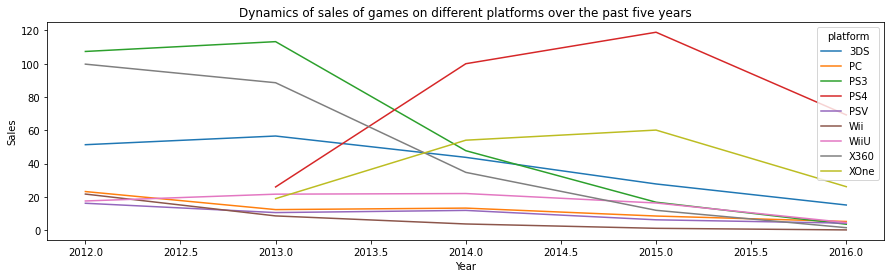

In [19]:
actual_sales = df[['platform', 'year_of_release', 'tot_sales']]
actual_sales = actual_sales[actual_sales['platform'] != 'DS']
actual_sales = actual_sales[actual_sales['platform'] != 'PSP'] 

actual_dinamic = actual_sales.groupby(['platform', 'year_of_release']).sum()
actual_dinamic = actual_dinamic.reset_index().rename_axis(None, axis=1)
actual_dinamic = actual_dinamic.pivot(index = 'year_of_release', columns = 'platform', values = 'tot_sales')

actual_dinamic.plot(figsize = (15, 4))
plt.title('Dynamics of sales of games on different platforms over the past five years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

Even in the last five years, there were two platforms that are no longer on the market (I removed them in this cell from the dataset so that the chart would not be noisy). The other two have only been around for four years and have the highest sales figures in the last three years (although the last year, like everyone else, showed a decline in profits).

Leading in sales XOne and PS4. PS3 and X360 fall most noticeably. Potentially profitable, I would include the same XOne and PS4, as the newest and most profitable over the past year, and 3DS, as the most profitable stable.

### Question 5: Graph global game sales by platform. Describe the result.

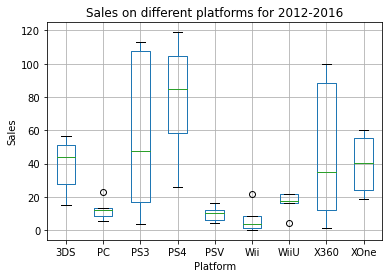

In [20]:
actual_dinamic.boxplot()
plt.title('Sales on different platforms for 2012-2016')
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.show()

I'm building a boxplot. It shows that the four platforms have consistently low sales, with separate successful (PC, Wii) or unsuccessful (WiiU) years.

For two platforms (PS3, X360), the values are very widely distributed, with short whiskers and no outliers, which means that in the specified period there were smooth but significant changes, a trend towards growth or decline in sales over several years (from the previous chart we know what was decline). At the same time, their medians are located significantly below the middle of the boxes, which means that the periods of high sales were rather short-lived.

PS4 shows the opposite picture - a high median and a long whiskers. This means that the platform had a short period of low sales, a short peak, and a most time-consuming period of relatively high sales (volumes are closer to the peak than to the bottom).

Two platforms (3DS, XOne) show stable revenue, not super high, but without emissions. The boxes are small, the whiskers too, that means there were no such significant fluctuations in sales volumes as on the platforms PS3 and X360. The 3DS has a slightly higher median than the XOne, but the lower tail is also longer, which means there was some local decline in revenue. The XOne boxplot is almost symmetrical, which means there was some ups and downs.

Based on these two graphs, for further analysis, I will keep only the market leaders - XOne, PS4 and 3DS

### Question 6. Look at how sales within one popular platform are affected by user and critic reviews. Plot a scatterplot and calculate the correlation between reviews and sales. Formulate conclusions.

In [21]:
top_list = ['XOne', 'PS4', '3DS']
df_scores = df[(df['user_score'].notna()) & (df['critic_score'].notna()) & (df['platform'].isin(top_list))]
df_scores = df_scores[['platform', 'user_score', 'critic_score', 'tot_sales']]
display(df_scores)

,platform,user_score,critic_score,tot_sales
42,PS4,8.3,97,12.62
62,3DS,7.2,78,9.90
73,3DS,8.7,88,9.17
77,PS4,4.3,82,8.58
92,PS4,5.7,83,7.66
...,...,...,...,...
16257,PS4,7.9,61,0.01
16261,PS4,5.5,51,0.01
16328,XOne,6.0,65,0.01
16361,XOne,8.2,63,0.01


I create a common dataframe without gaps in the assessments of critics, players and with three top platforms. Yes, I understand that some of the ratings disappeared in those lines where there was no rating from one of the sources, but there were quite a few of them. And now we have clean complete data.

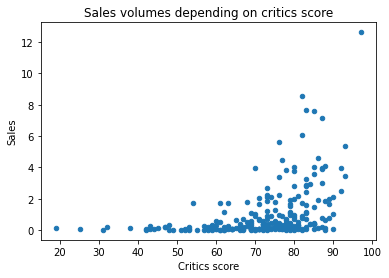

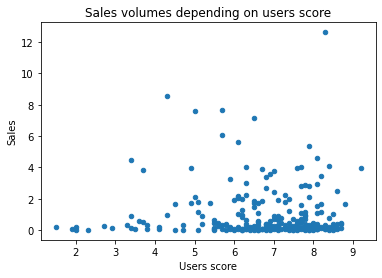

In [22]:
df_PS4_scores = df_scores[df_scores['platform'] == 'PS4']
df_PS4_scores.plot(kind = 'scatter', x = 'critic_score', y = 'tot_sales')
plt.title('Sales volumes depending on critics score')
plt.xlabel('Critics score')
plt.ylabel('Sales')
plt.show()

df_PS4_scores.plot(kind = 'scatter', x = 'user_score', y = 'tot_sales')
plt.title('Sales volumes depending on users score')
plt.xlabel('Users score')
plt.ylabel('Sales')
plt.show()

I build scatter plots of sales volumes depending on the ratings of critics and players.

Visually, we can say that there is definitely a correlation - the higher the ratings, the higher the sales. At the same time, the data is not evenly distributed; there are very few sales in the area of low estimates. Critics' ratings are much more strongly correlated with sales, while users rate the best-selling games as mediocre. This is easily explained by the factor of subjective experience.

At the same time, most games, both with high and low ratings, have rather low sales, up to 1 million copies.

Now let's look at the numbers.

In [23]:
df_PS4_scores.corr()

,user_score,critic_score,tot_sales
user_score,1.000000,0.557654,-0.033625
critic_score,0.557654,1.000000,0.405895
tot_sales,-0.033625,0.405895,1.000000


Critics' score moderately but surely correlates with sales volume, the correlation coefficient is 0.41. But for users ratings, the connection with sales is approximately zero, we can’t even confidently talk about its presence. 

Now let's look at the two remaining platforms.

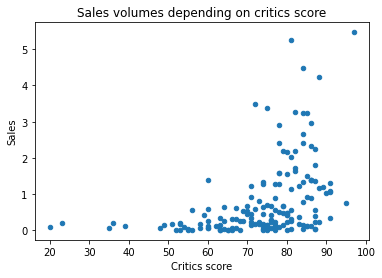

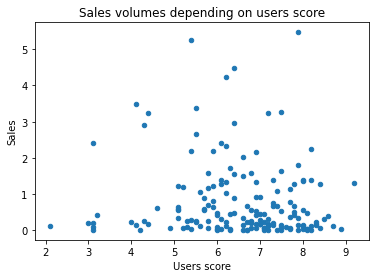

In [24]:
df_XOne_scores = df_scores[df_scores['platform'] == 'XOne']
df_XOne_scores.plot(kind = 'scatter', x = 'critic_score', y = 'tot_sales')
plt.title('Sales volumes depending on critics score')
plt.xlabel('Critics score')
plt.ylabel('Sales')
plt.show()

df_XOne_scores.plot(kind = 'scatter', x = 'user_score', y = 'tot_sales')
plt.title('Sales volumes depending on users score')
plt.xlabel('Users score')
plt.ylabel('Sales')
plt.show()

Sales on the XOne platform. The trend is the same as the PS4 - most games have sales under a million, critics' ratings seem to correlate with sales, players ratings are scattered even more chaotically and hardly show any correlation.

Let's look at the numbers:

In [25]:
df_XOne_scores.corr()

,user_score,critic_score,tot_sales
user_score,1.000000,0.472462,-0.094003
critic_score,0.472462,1.000000,0.410422
tot_sales,-0.094003,0.410422,1.000000


The numbers are also close to the first platform - 0.41 for the critics' ratings, and a slightly more minus zero for the players' ratings. It is already clear that it makes no sense to conduct surveys of players to increase sales.

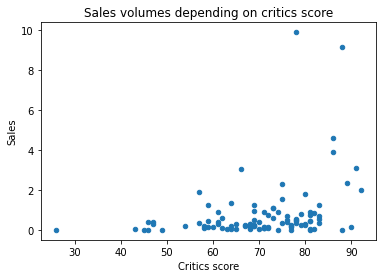

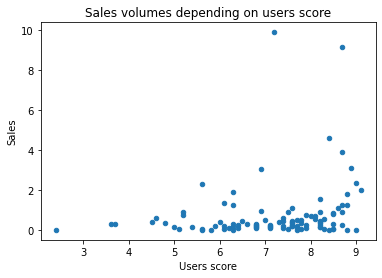

In [26]:
df_3DS_scores = df_scores[df_scores['platform'] == '3DS']
df_3DS_scores.plot(kind = 'scatter', x = 'critic_score', y = 'tot_sales')
plt.title('Sales volumes depending on critics score')
plt.xlabel('Critics score')
plt.ylabel('Sales')
plt.show()

df_3DS_scores.plot(kind = 'scatter', x = 'user_score', y = 'tot_sales')
plt.title('Sales volumes depending on users score')
plt.xlabel('Users score')
plt.ylabel('Sales')
plt.show()

There are fewer games on the 3DS platform, so the graphs look empty and practically do not differ from each other in the shape of the scattering.

In [27]:
df_3DS_scores.corr()

,user_score,critic_score,tot_sales
user_score,1.000000,0.722762,0.201813
critic_score,0.722762,1.000000,0.310553
tot_sales,0.201813,0.310553,1.000000


The numbers here differ from the two previous platforms: the critics are less accurate, the correlation is 0.31. Weak positive relationship, but still it is more likely than not.

The players still don't know what they want, but they are already trying to figure it out: the 0.2 correlation can also indicate the presence of a weak positive relationship (with more observations, of course). For now, just stating a fact: on this platform, judging by this sample, the opinion of the players is more correlated with their willingness to buy games.

### Question 7. Look at the overall distribution of games by genre. What about the most profitable genres? Do genres with high and low sales stand out?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


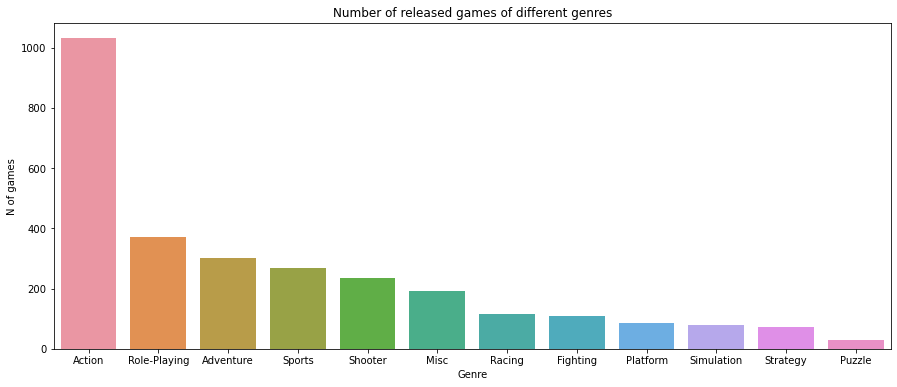

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


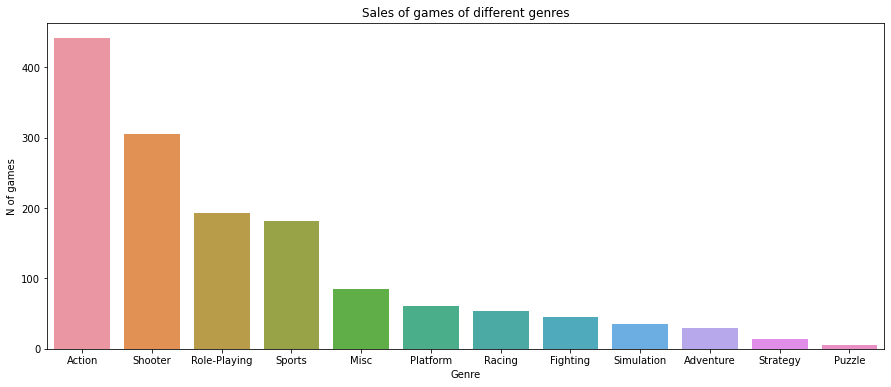

In [28]:
df_genre = df[['genre', 'tot_sales']]

genre_n = df_genre.groupby(by = 'genre').count().sort_values(by = 'tot_sales', ascending = False)
plt.figure(figsize=(15,6))
sns.barplot(genre_n.index, genre_n['tot_sales'])
plt.title('Number of released games of different genres')
plt.xlabel('Genre')
plt.ylabel('N of games')
plt.show()

print()
genre_s = df_genre.groupby(by = 'genre').sum().sort_values(by = 'tot_sales', ascending = False)
plt.figure(figsize=(15, 6))
sns.barplot(genre_s.index, genre_s['tot_sales'])
plt.title('Sales of games of different genres')
plt.xlabel('Genre')
plt.ylabel('N of games')
plt.show()

Look. See that games of different genres are produced in different numbers, and their sales volumes are also very different. At the same time, the position of games in the first and second ratings +/- is the same, which is logical - the more games of a certain genre generate income, the more developers try to release them. The most profitable genres are Action, Shooters, role-playing and sports games. The rest are more than twice behind them.

The least popular are strategies and puzzles.

## Create a user profile for each region

Define for the user of each region (NA, EU, JP):
- Most popular platforms (top 5). Describe the differences in sales shares.
- The most popular genres (top 5). Explain the difference.

Does the ESRB rating affect sales in a particular region?

In [29]:
df_na = df[['na_sales', 'platform', 'genre', 'rating']]
df_eu = df[['eu_sales', 'platform', 'genre', 'rating']]
df_jp = df[['jp_sales', 'platform', 'genre', 'rating']]

Create dataframes by region.

### Identifying the most popular platforms by region

In [30]:
print('Top-5 Popular Platforms:')
print()
print('North America:')
print(df_na.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head())
print()
print('Europe:')
print(df_eu.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head())
print()
print('Japan:')
print(df_jp.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head())

Top-5 Popular Platforms:

North America:
platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

Europe:
platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

Japan:
platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64


As we can see, the popularity of platforms varies widely across countries. So, in North America, the X360 is in the lead, and in Japan it didn't even get into the top five.

In all regions, PS3, PS4 and 3DS are in the lead. And here Japan goes its own way - PS4 is only fourth, and even if we adjust for the size of the market, it still will not catch up with the popularity of this platform either in Europe or in America. PSV and WiiU, which are present in the Japanese top, are not popular either in Europe or in America.

### Identifying the most popular game genres by region

In [31]:
print('Top-5 popular genres:')
print()
print('North America:')
display()
print(df_na.groupby('genre')['na_sales'].sum().sort_values(ascending = False).head())
print()
print('Europe:')
display()
print(df_eu.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).head())
print()
print('Japan:')
display()
print(df_jp.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).head())

Top-5 popular genres:

North America:
genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64

Europe:
genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64

Japan:
genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64


The genre preferences of American and European gamers are very close - only the fifth line of the rating differs. Japan matches their top with only two positions - action and role-playing games, and then with reverse popularity. In general, we can say that Action is the leader in popularity in the world.

### Assessing the impact of the ESRB rating on sales volumes

In [32]:
df_na = df_na[df_na['rating'].notna()]
df_eu = df_eu[df_eu['rating'].notna()]
df_jp = df_jp[df_jp['rating'].notna()]

ESRB rating is not numeric and contains NanS. Preliminary removal of rows with gaps would reduce the sample for analysis, so I'm removing the gaps now, from the subsets. Then I'm assigning a numerical index to each rating, and calculating the correlations.

In [33]:
print(df['rating'].unique())

def rating_cat(row):
    if row['rating'] == 'E':
        return 1
    elif row['rating'] == 'E10+':
        return 2
    elif row['rating'] == 'T':
        return 3
    return 4

df_na['rating_cat'] = df_na.apply(rating_cat, axis = 1)
df_eu['rating_cat'] = df_eu.apply(rating_cat, axis = 1)
df_jp['rating_cat'] = df_jp.apply(rating_cat, axis = 1)

display(df_na.head(20))

['M' nan 'E' 'E10+' 'T']


,na_sales,platform,genre,rating,rating_cat
16,7.02,PS3,Action,M,4
23,9.66,X360,Action,M,4
34,4.99,PS3,Shooter,M,4
35,8.25,X360,Shooter,M,4
42,3.96,PS4,Action,M,4
60,6.73,X360,Shooter,M,4
62,3.66,3DS,Platform,E,1
66,6.65,X360,Shooter,M,4
69,4.10,PS3,Shooter,M,4
73,2.03,3DS,Simulation,E,1


I look at the list of ratings and write a function to match them with category numbers. Next, I apply the function to the dataframes of the regions.

In [34]:
print('Correlation between sales and age rating:')
print()
print('North America')
print(df_na['rating_cat'].corr(df_na['na_sales']))
print()
print('Europe')
print(df_eu['rating_cat'].corr(df_eu['eu_sales']))
print()
print('Japan')
print(df_jp['rating_cat'].corr(df_jp['jp_sales']))

Correlation between sales and age rating:

North America
0.08902967110546689

Europe
0.05959965918542144

Japan
-0.03568696539945692


Next, I calculate the correlations between sales and age rating.

In all three regions, the relations between the rating and sales success is tend to zero. Which is understandable, a good or bad game can be made for any audience, and both adults and children are equally active in computer games (the volume of markets does not differ much).

## Test Hypotheses

### The average userы ratings of the Xbox One and PC platforms are the same

In [35]:
alpha = .05
us_scor = df.loc[df['user_score'].notna()]

plat_rat = st.ttest_ind(us_scor.loc[us_scor['platform'] == 'XOne', "user_score"], us_scor.loc[us_scor['platform'] == 'PC', "user_score"])

print(plat_rat.pvalue)

if plat_rat.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Can't reject the null hypothesis") 

0.5535080500643661
Can't reject the null hypothesis


To test the first assumption, I formulate the null and alternative hypotheses:

H0 - The average user ratings of the Xbox One and PC platforms are equal.

H1 - The average user ratings of the Xbox One and PC platforms differ.

I create a df without gaps with the user estimates and perform a statistical check for the significance of the differences in the means of the two samples.

I use the t-test to check. The hypothesis is two-sided, it is not necessary to divide the resulting p-value. I take the alpha significance level as standard.

As a result of the check, we get p = 0.55 - there can be no talk of any significant differences. Obviously both successful and unsuccessful games come out on both platforms.

### Average user ratings for the Action and Sports genres are different

In [36]:
gen_rat = st.ttest_ind(us_scor.loc[us_scor['genre'] == 'Action', "user_score"], us_scor.loc[us_scor['genre'] == 'Sports', "user_score"])

print(gen_rat.pvalue)

if gen_rat.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Can't reject the null hypothesis") 

3.7163089460934874e-26
Rejecting the null hypothesis


For the second assumption, the hypotheses will be:

H0 - the average user ratings of the Action and Sports genres are the same.

H1 - the average user ratings of the Action and Sports genres differ significantly.

I use the same dataset and the same level of significance.

The null hypothesis is categorically rejected. This is strange, because it would seem that each genre has its own audience, and no one forces you to play unloved games. However, the fact remains, we can only accept the numbers.

## Conclusions

Based on the results of the study, I can give clients the following recommendations:
- It is worth focusing on the XOne, PS4 and 3DS platforms. PS3, although included in the top five in all regions, rather rests on laurels - the last three years, sales on the platform are not very good and declining. PS4 deserves special attention, as sales on this platform over the past two years are greater than on the other two combined (188.15 million versus 129.21 million for 3DS and Xone combined).
- When planning work, you should not rely on user reviews - their enthusiasm and disappointment do not particularly correlate with the willingness to pay money (the correlation coefficient ranges from 0.2 to -0.09 - as you understand, these numbers are closer to zero than to some kind of relationship). But the reviews of critics are worth listening to, obviously, they analyze the basic needs of the gaming world, and not subjective experience. Also not perfect, their estimates correlate with sales by 30-40%.
- It is worth paying attention to the fact that the genres in which the most games are released and the genres in which games are best sold are not exactly the same genres. So, adventures take the third place in terms of the volume of released games, but in terms of sales they are third from the bottom. If you want to make a large assortment and not lose revenue, then it is best to focus on the Action, RPG, Shooter and Sports genres - these are the top 4 in terms of sales and the top 5 (together with adventure) in terms of released games. Action - the undisputed leader, sales are about 400 million. Shooters, with a relatively small number of released games, are sold for 300 million, obviously each of these positions is in demand. Role-playing and sports games have sales of about 200 million, despite the fact that both of them are produced more than shooters.
- Japan is very different from Europe and North America in terms of preferences, both in preferred platforms and in favorite genres. So, the most popular PS4 in Europe and North America (about 140 and 110 million sales, respectively) in Japan barely even reached 16 million. And in general, the Japanese market is much smaller - sales for the most popular genre of games in the CA and the EU are 178 and 159 million copies, and only 65 million in Japan. Think carefully about whether you need this market, and if so, get ready to expand the range for specific requests.
- The age rating of the game does not affect sales. You can even sell Teletubbies if it's Action with a high critics score.
- If new platforms appear, it is better to add them to the assortment closer to their first birthday. Most of the platforms don't survive one year, but in survivors the peak of interest falls on the second or third year of existence - the gaming world is characterized by interest in new products. In 5-7 years this platform will most likely disappear.